<a href="https://colab.research.google.com/github/CaptainLight5/Emotion-Prediction/blob/main/Emotional_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# This is the section that loads the  datasets
train_df = pd.read_csv('/content/WASSA23_essay_level_with_labels_train.tsv', sep='\t')
dev_df = pd.read_csv('/content/WASSA23_essay_level_dev.tsv', sep='\t')
test_df = pd.read_csv('/content/WASSA23_essay_level_test.tsv', sep='\t')

# This section display some information about the datasets
print("Training Data Info:")
print(train_df.info())
print(train_df.head())

print("\nDevelopment Data Info:")
print(dev_df.info())
print(dev_df.head())

print("\nTest Data Info:")
print(test_df.info())
print(test_df.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   conversation_id                792 non-null    int64  
 1   article_id                     792 non-null    int64  
 2   essay                          792 non-null    object 
 3   empathy                        792 non-null    float64
 4   distress                       792 non-null    float64
 5   speaker_id                     792 non-null    int64  
 6   gender                         792 non-null    object 
 7   education                      792 non-null    object 
 8   race                           792 non-null    object 
 9   age                            792 non-null    object 
 10  income                         792 non-null    object 
 11  personality_conscientiousness  792 non-null    object 
 12  personality_openess           

In [ ]:

# The preprecessing is conducted with NLTK toolkit

nltk.download('stopwords')
nltk.download('wordnet')

# here I Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# this is the function to clean text
def clean_text(text):
  # this removes the punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
  # here I convert the text to lowercase
    text = text.lower()
  #  This removes stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
  # this Lemmatize the words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

  # here I applied text cleaning

train_df['essay'] = train_df['essay'].apply(clean_text)
dev_df['essay'] = dev_df['essay'].apply(clean_text)
test_df['essay'] = test_df['essay'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

# This initializees the TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

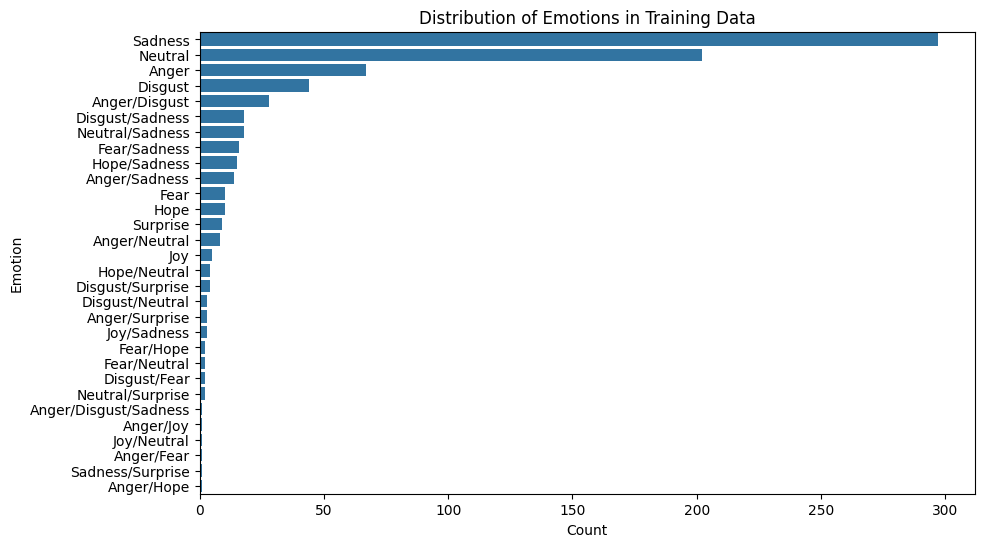

In [ ]:

# Exploratory Data Analysis (EDA)

# this is the  distribution of Emotions
plt.figure(figsize=(10, 6))
sns.countplot(y='emotion', data=train_df, order=train_df['emotion'].value_counts().index)
plt.title('Distribution of Emotions in Training Data')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

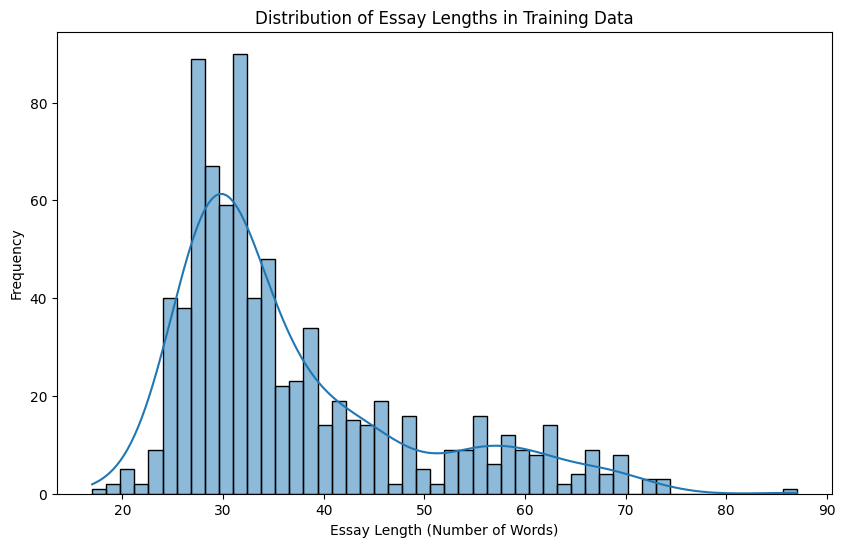

count    792.000000
mean      36.756313
std       11.902043
min       17.000000
25%       29.000000
50%       32.000000
75%       42.000000
max       87.000000
Name: essay_length, dtype: float64


In [ ]:
# this is the distribution of Essay Lengths
train_df['essay_length'] = train_df['essay'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_df['essay_length'], bins=50, kde=True)
plt.title('Distribution of Essay Lengths in Training Data')
plt.xlabel('Essay Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

print(train_df['essay_length'].describe())

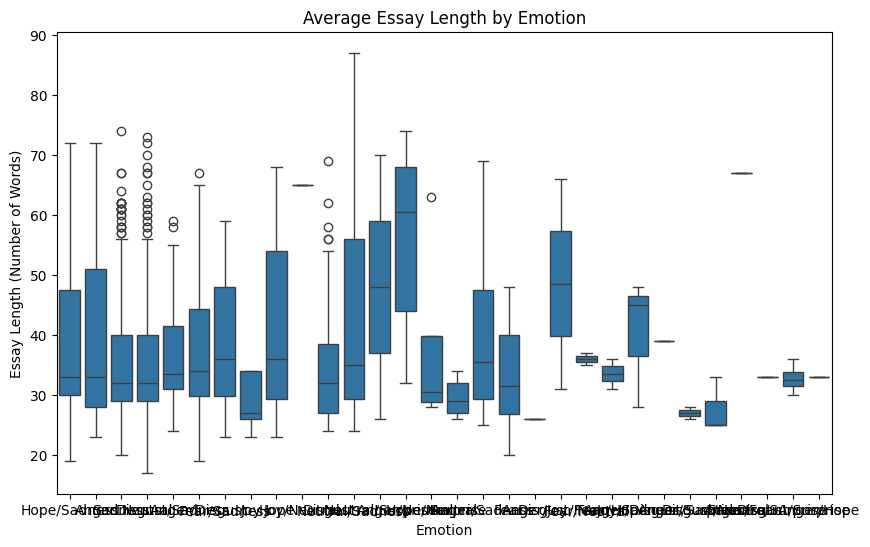

In [ ]:
# the average Essay Length by Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='essay_length', data=train_df)
plt.title('Average Essay Length by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Essay Length (Number of Words)')
plt.show()

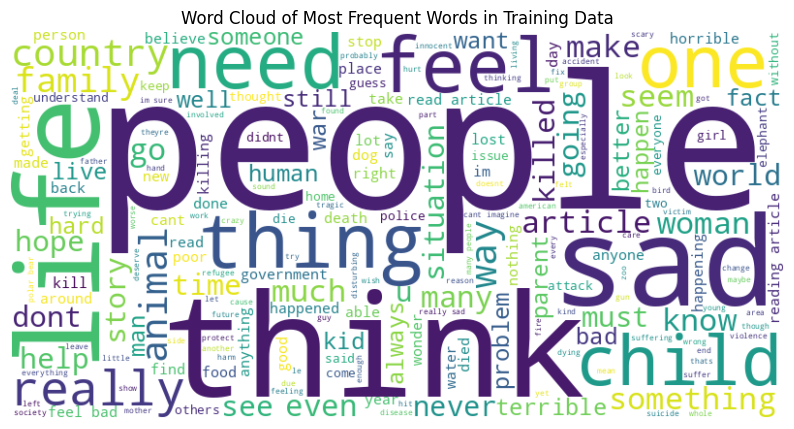

In [ ]:

# this is the EDA of the Word Cloud of Most Frequent Words
from wordcloud import WordCloud

text = ' '.join(train_df['essay'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words in Training Data')
plt.axis('off')
plt.show()


In [ ]:

# the section handles the Label Encoding

combined_df = pd.concat([train_df, dev_df])
label_encoder = LabelEncoder()
combined_df['emotion'] = label_encoder.fit_transform(combined_df['emotion'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Logistic Regression: {'clf__C': 10, 'clf__solver': 'saga'}
Best Logistic Regression - Validation Set
Accuracy: 0.4968553459119497
Classification Report:
                   precision    recall  f1-score   support

           Anger       0.60      0.25      0.35        12
   Anger/Disgust       0.00      0.00      0.00         9
      Anger/Hope       0.00      0.00      0.00         1
   Anger/Neutral       0.00      0.00      0.00         3
   Anger/Sadness       0.00      0.00      0.00         2
  Anger/Surprise       0.00      0.00      0.00         1
         Disgust       0.00      0.00      0.00        10
 Disgust/Sadness       0.00      0.00      0.00         1
Disgust/Surprise       0.00      0.00      0.00         1
            Fear       0.00      0.00      0.00         2
       Fear/Hope       0.00      0.00      0.00         1
    Fear/Neutral       0.00      0.00      0.00         1
    Fear/Sadness       0.00      0.00      0.00         2
            H

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


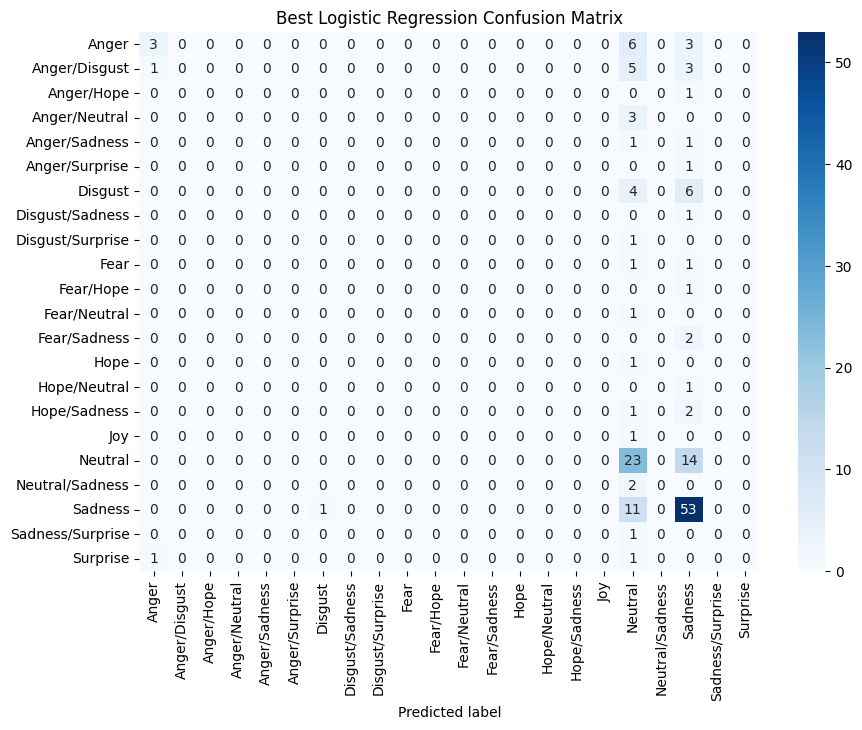

In [ ]:

# Here I execute the Train-Test Split

X_train, X_val, y_train, y_val = train_test_split(combined_df['essay'][:len(train_df)], combined_df['emotion'][:len(train_df)], test_size=0.2, random_state=42)

# Model Training and Evaluation
# I iniatedted the Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# This is the Logistic Regression with Grid Search
lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', LogisticRegression(max_iter=1000))
])

lr_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'saga']
}

lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=cv, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

best_lr_model = lr_grid_search.best_estimator_
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)

y_val_pred_best_lr = best_lr_model.predict(X_val)
print("Best Logistic Regression - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_best_lr))

#this gets the unique classes present in y_val and y_val_pred_best_lr
unique_classes = np.unique(np.concatenate((y_val, y_val_pred_best_lr)))
print("Classification Report:\n", classification_report(y_val, y_val_pred_best_lr, labels=unique_classes, target_names=label_encoder.inverse_transform(unique_classes)))

cm_best_lr = confusion_matrix(y_val, y_val_pred_best_lr, labels=unique_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform(unique_classes), yticklabels=label_encoder.inverse_transform(unique_classes))
plt.title('Best Logistic Regression Confusion Matrix')
plt.xlabel('Predicted label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Random Forest: {'clf__max_depth': None, 'clf__n_estimators': 200}
Best Random Forest - Validation Set
Accuracy: 0.5471698113207547
Classification Report:
                   precision    recall  f1-score   support

           Anger       1.00      0.08      0.15        12
   Anger/Disgust       0.00      0.00      0.00         9
      Anger/Hope       0.00      0.00      0.00         1
   Anger/Neutral       0.00      0.00      0.00         3
   Anger/Sadness       0.00      0.00      0.00         2
  Anger/Surprise       0.00      0.00      0.00         1
         Disgust       0.00      0.00      0.00        10
 Disgust/Sadness       0.00      0.00      0.00         1
Disgust/Surprise       0.00      0.00      0.00         1
            Fear       0.00      0.00      0.00         2
       Fear/Hope       0.00      0.00      0.00         1
    Fear/Neutral       0.00      0.00      0.00         1
    Fear/Sadness       0.00      0.00      0.00         2
            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


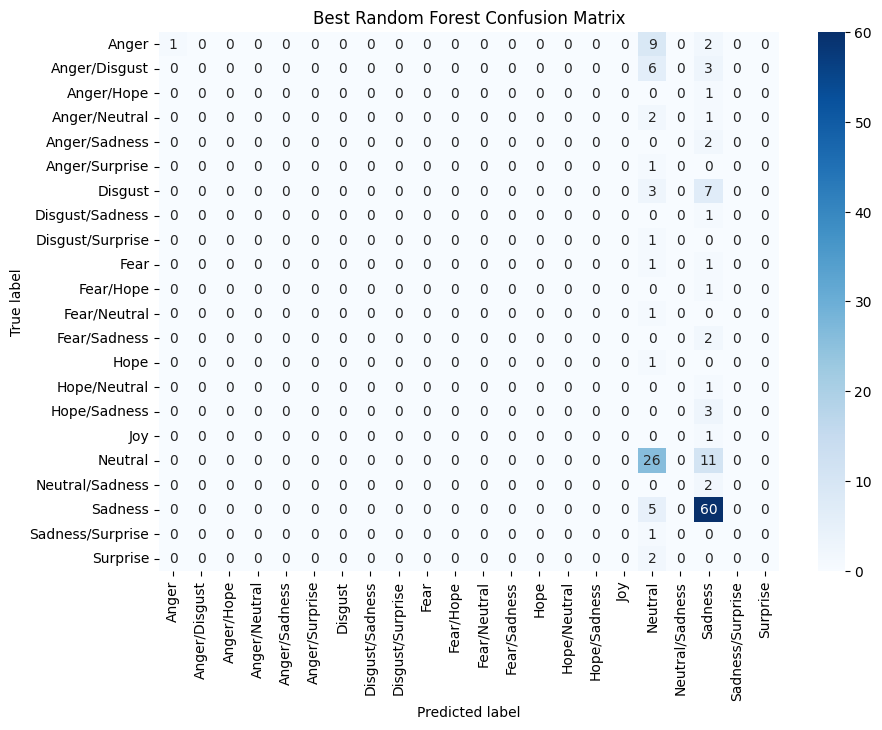

In [ ]:
# Random Forest with Grid Search
rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

y_val_pred_best_rf = best_rf_model.predict(X_val)
print("Best Random Forest - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_best_rf))
print("Classification Report:\n", classification_report(y_val, y_val_pred_best_rf, labels=unique_classes, target_names=label_encoder.inverse_transform(unique_classes)))

cm_best_rf = confusion_matrix(y_val, y_val_pred_best_rf, labels=unique_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform(unique_classes), yticklabels=label_encoder.inverse_transform(unique_classes))
plt.title('Best Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters for SVM: {'clf__C': 1}
Best Support Vector Machine - Validation Set
Accuracy: 0.5031446540880503
Classification Report:
                   precision    recall  f1-score   support

           Anger       0.43      0.25      0.32        12
   Anger/Disgust       0.00      0.00      0.00         9
      Anger/Hope       0.00      0.00      0.00         1
   Anger/Neutral       0.00      0.00      0.00         3
   Anger/Sadness       0.00      0.00      0.00         2
  Anger/Surprise       0.00      0.00      0.00         1
         Disgust       0.50      0.20      0.29        10
 Disgust/Sadness       0.00      0.00      0.00         1
Disgust/Surprise       0.00      0.00      0.00         1
            Fear       0.00      0.00      0.00         2
       Fear/Hope       0.00      0.00      0.00         1
    Fear/Neutral       0.00      0.00      0.00         1
    Fear/Sadness       0.00      0.00      0.00         2
            Hope       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


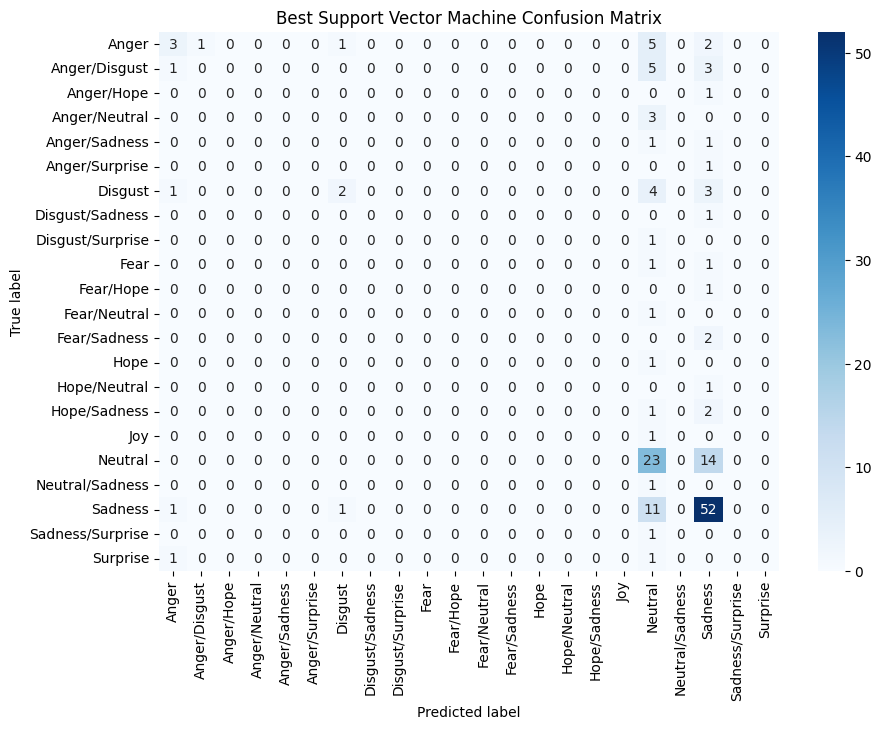

In [ ]:
# Support Vector Machine (SVM) with Grid Search
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', LinearSVC())
])

svm_param_grid = {
    'clf__C': [0.1, 1, 10]
}

svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

best_svm_model = svm_grid_search.best_estimator_
print("Best Parameters for SVM:", svm_grid_search.best_params_)

y_val_pred_best_svm = best_svm_model.predict(X_val)
print("Best Support Vector Machine - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_best_svm))
print("Classification Report:\n", classification_report(y_val, y_val_pred_best_svm, labels=unique_classes, target_names=label_encoder.inverse_transform(unique_classes)))

cm_best_svm = confusion_matrix(y_val, y_val_pred_best_svm, labels=unique_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform(unique_classes), yticklabels=label_encoder.inverse_transform(unique_classes))
plt.title('Best Support Vector Machine Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()